# Predicting Water Pump Functionality in Tanzania (HydroLogic Project)
By: Farzaneh Gerami, Subaye ...... and Mariam .....
March - June 2025


# Overview
A machine learning project to predict the functionality status of water pumps across Tanzania based on a variety of features including location, water quality, management structure, and technical specifications. It addresses a critical infrastructure challenge: identifying which water pumps are functional, need repairs, and are non-functional.

# Introduction
Access to clean and reliable water is fundamental to public health and socio-economic development. In Tanzania, ensuring sustainable water supply and sanitation services is a priority aligned with global initiatives like the Sustainable Development Goals (SDGs), particularly SDG 6, which emphasizes the availability and sustainable management of water and sanitation for all. The Ministry of Water has developed comprehensive guidelines, such as the Design, Construction, Supervision, Operation, and Maintenance (DCOM) manual, to support the planning and implementation of water supply projects across the country.

# Problem Statement
Despite significant efforts, many communities in Tanzania still face challenges with non-functional or partially functional water pumps, leading to inconsistent access to clean water. Factors contributing to this issue include inadequate maintenance, environmental conditions, and technical failures. Addressing these challenges requires a systematic approach to predict and monitor water pump functionality, enabling timely interventions and resource allocation.

# Project Goal
The primary objective of this project is to develop machine learning models capable of predicting the functionality status of water pumps across Tanzania. By analyzing various factors such as location, water quality, management structures, and technical specifications, the project aims to identify which pumps are functional, which require repairs, and which are non-functional. This predictive capability will enhance maintenance operations, ensure better resource distribution, and ultimately improve access to clean water for communities.

# Sources: 
1. Water.org (https://water.org/our-impact/where-we-work/tanzania/)
2. WasserStiftung (https://water.org/our-impact/where-we-work/tanzania/)
3. Chowdavarapu,I.K., Manikandan, V.D. (2016). Data Mining the Water Pumps: Determining the functionality of Water 
Pumps in Tanzania using SAS® Enterprise Miner 
4. IBM (https://www.ibm.com/think/topics/predictive-maintenance)

# Imports

In [67]:
# Imports
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

#import seaborn as sns
import matplotlib.pyplot as plt

#
import seaborn as sns

import datetime

import math

## Read in all our Data

Question: here i load the data from the local repository
// df_values = pd.read_csv('../data/raw/Training_Set_Values.csv')
// df_labels = pd.read_csv('../data/raw/Training_Set_Labels.csv')

In [21]:
# Load features and labels
url_train_labels = "https://raw.githubusercontent.com/fsmariam/HydroLogic/refs/heads/main/data/raw/Training_Set_Labels.csv"
train_labels = pd.read_csv(url_train_labels)
url_train_values = "https://raw.githubusercontent.com/fsmariam/HydroLogic/refs/heads/main/data/raw/Training_Set_Values.csv"
train_values = pd.read_csv(url_train_values)
url_test_values = "https://raw.githubusercontent.com/fsmariam/HydroLogic/refs/heads/main/data/raw/Test_Set_Values.csv"
test_values = pd.read_csv(url_test_values)
print('Data is loaded!')

Data is loaded!


## Preview the dataset

In [23]:
# Preview the dataset
train_labels.head(10)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
5,9944,functional
6,19816,non functional
7,54551,non functional
8,53934,non functional
9,46144,functional


In [24]:
# Preview the dataset
train_values.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


# Merge Train Data

In [25]:
# Merge them
#df_train = train_values.merge(train_labels, on="id", how="left")
df_train = pd.merge(train_values, train_labels, on='id')
# df = pd.concat([df_values, df_labels], axis=1)

df_train.to_csv('../data/interim/merged_trained_data.csv', index=False) 

# Preview the dataset
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


# Basic Exploration

In [37]:
# Shape of the dataset
print("Training Shape:", df_train.shape)
print("Test Shape:", test_values.shape)

Training Shape: (59400, 41)
Test Shape: (14850, 40)


### Overview of data types & missing values

In [38]:
# Overview of data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [53]:
# Last 5 rows
df_train.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


# Summary Statistics

In [28]:
# Summary statistics for numerical features
df_train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


Based on Chatgpt the min and max for Tanzania is: Latitude: ~-11.75° to -1.00° , Longitude: ~29.35°E to 40.45°E. 

In [29]:
# Look at the distribution of the target variable
df_train['status_group'].value_counts()

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

## Categorical Features
exploring the most common values in each categorical column

In [41]:
# Select categorical columns
categorical = df_train.select_dtypes(include='object').columns

# Count unique values
for col in categorical:
    print(f"{col}:\n", df_train[col].value_counts(normalize=True).head(5))

date_recorded:
 date_recorded
2011-03-15    0.009630
2011-03-17    0.009394
2013-02-03    0.009192
2011-03-14    0.008754
2011-03-16    0.008636
Name: proportion, dtype: float64
funder:
 funder
Government Of Tanzania    0.162904
Danida                    0.055843
Hesawa                    0.039489
Rwssp                     0.024640
World Bank                0.024192
Name: proportion, dtype: float64
installer:
 installer
DWE           0.312171
Government    0.032738
RWE           0.021634
Commu         0.019015
DANIDA        0.018836
Name: proportion, dtype: float64
wpt_name:
 wpt_name
none         0.059985
Shuleni      0.029429
Zahanati     0.013974
Msikitini    0.009007
Kanisani     0.005438
Name: proportion, dtype: float64
basin:
 basin
Lake Victoria      0.172525
Pangani            0.150505
Rufiji             0.134276
Internal           0.131061
Lake Tanganyika    0.108283
Name: proportion, dtype: float64
subvillage:
 subvillage
Madukani    0.008606
Shuleni     0.008572
Majengo     

In [42]:
# Count unique values for each categorical column
unique_counts = df_train[categorical].nunique().sort_values(ascending=False)

# Display
print("Unique value counts per categorical column:")
print(unique_counts)

Unique value counts per categorical column:
wpt_name                 37399
subvillage               19287
scheme_name               2695
installer                 2145
ward                      2092
funder                    1896
date_recorded              356
lga                        125
region                      21
extraction_type             18
extraction_type_group       13
management                  12
scheme_management           11
source                      10
basin                        9
water_quality                8
waterpoint_type              7
source_type                  7
payment                      7
payment_type                 7
extraction_type_class        7
waterpoint_type_group        6
quality_group                6
quantity                     5
quantity_group               5
management_group             5
source_class                 3
status_group                 3
public_meeting               2
permit                       2
recorded_by               

In [46]:
# Show Least Frequent (Rare) Categories
print("\n Least frequent values per column:\n")

for col in categorical:
    print(f"\nColumn: {col}")
    print(df_train[col].value_counts(normalize=True).tail(3))  # Shows proportion
    print(df_train[col].value_counts().tail(3))  # Raw counts


 Least frequent values per column:


Column: date_recorded
date_recorded
2011-09-26    0.000017
2011-09-12    0.000017
2013-12-01    0.000017
Name: proportion, dtype: float64
date_recorded
2011-09-26    1
2011-09-12    1
2013-12-01    1
Name: count, dtype: int64

Column: funder
funder
Banca Reale     0.000018
Peter Mayiro    0.000018
Kahema          0.000018
Name: proportion, dtype: float64
funder
Banca Reale     1
Peter Mayiro    1
Kahema          1
Name: count, dtype: int64

Column: installer
installer
UPM           0.000018
Magul         0.000018
Magoma ADP    0.000018
Name: proportion, dtype: float64
installer
UPM           1
Magul         1
Magoma ADP    1
Name: count, dtype: int64

Column: wpt_name
wpt_name
Kwa Yahona Kuvala    0.000017
Mshoro               0.000017
Kwa Tukai            0.000017
Name: proportion, dtype: float64
wpt_name
Kwa Yahona Kuvala    1
Mshoro               1
Kwa Tukai            1
Name: count, dtype: int64

Column: basin
basin
Lake Nyasa                 0

# Key insights by Column
#### Funder: 
Top funder is "Government Of Tanzania", accounting for a significant portion and Common funders include organizations like Danida and World Bank. Maybe better grouping low-frequency funders into an "Other" category and standardizing names (e.g., "danida" vs. "Danida").

#### installer:
Similar to funder, has many unique values and inconsistencies. "DWE" is typically the most frequent installer. we can group rare installers, and consider combining near-duplicate values.

#### wpt_name: 
Very high cardinality (possibly unique to each record). In my opinion, not useful as a predictive feature in its raw form. Maybe Consider dropping this column or transforming it if location grouping is meaningful.

#### basin: 
Clean categorical data. Limited set of known water basins like "Lake Victoria", "Pangani", etc. It is a good candidate for one-hot encoding or label encoding.

#### region, lga, ward: 
Represent hierarchical geographic divisions.region has manageable categories. lga and ward have many unique values. Maybe, we can consider encoding region directly; lga and ward may need grouping or geo-clustering.

#### public_meeting, permit: 
Boolean-type fields (Yes/No) but may contain missing values. we can impute missing values based on related features (e.g., scheme_management) or majority class.

#### extraction_type, management, payment, water_quality, source: 
Medium to low cardinality. Categories are generally clean but could still have rare values. Can be directly encoded using one-hot or target encoding.

#### status_group: 
Classes: "functional", "non functional", "functional needs repair". Imbalanced: majority is "functional", with a small percentage needing repair. Model evaluation should use metrics like F1-score, and possibly apply class balancing techniques.


# Initial Observations

## Database Overview
 - The dataset has over 59,000 rows and 41 features.
 - Test samples are 14,850

 Features: we have 39 input features and 1 target (status_group)
 - The target variable `status_group` has 3 classes:
   - functional (32359) - 54%
   - functional needs repair (4317) - 38%
   - non functional (22824) - 7%

## Data quality & structure
### Missing or Zero Values
- `construction_year` has many values set to 0 (likely missing).
- `permit` and `public_meeting` contain missing values (`NaN`).
- These missing values may affect model accuracy if not imputed thoughtfully.

### Categorical Feature Analysis
- Many features are categorical, including `funder`, `installer`, and `basin`.
- Some fields like `funder` and `installer` are very high-cardinality (over 2,000 unique values).This may leads to overfitting if left unprocessed.
- `wpt_name` appears to be a unique or near-unique identifier; may not be useful directly.

### Data Distribution
- Some fields like `date_recorded` span multiple years.
- Location-based features (`region`, `lga`, `ward`) may offer useful spatial patterns.
- Some variables have dominant classes (e.g., "Government Of Tanzania" in `funder`).

## Key Observations

- Class imbalance in target values could bias models toward majority class.
- Some categorical variables likely need cleaning (inconsistent spelling, capitalization).
- Several features are redundant or too granular (like `wpt_name`), which might hurt model performance.
- `funder` and `installer` contain useful information, but may need grouping or encoding to reduce dimensionality.

# other observations
 - Rare values may not provide enough examples for the model to learn from.
 - Some fields may include messy or inconsistent formatting, such as different capitalizations or spellings for the same value.
 - construction_year has many zeros, which may indicate missing/invalid data.
 - Some coordinates (longitude, latitude) are 0, likely incorrect.
 - Columns such as basin, source_class, and water_quality show clean and well-defined categories, which are ideal for encoding.

# Questions for Further Investigation
- Can we extract time-based features from `date_recorded`? (e.g., year, month, season)
- How can we handle 0 or missing values in `construction_year`?
- Should rare funders and installers be grouped under "Other" or cleaned up into broader categories?
- Do spatial features (`longitude`, `latitude`, `region`) correlate with pump status?
- Should `wpt_name` be dropped or transformed into something more useful (e.g., location-based clusters)?
- Can we engineer a composite quality score from `water_quality`, `quantity`, and `source`?
- Are there duplicate or redundant columns we could drop?
- Which features are most important in predicting pump functionality?


## Visualisation of Distribution in Numerical Categories

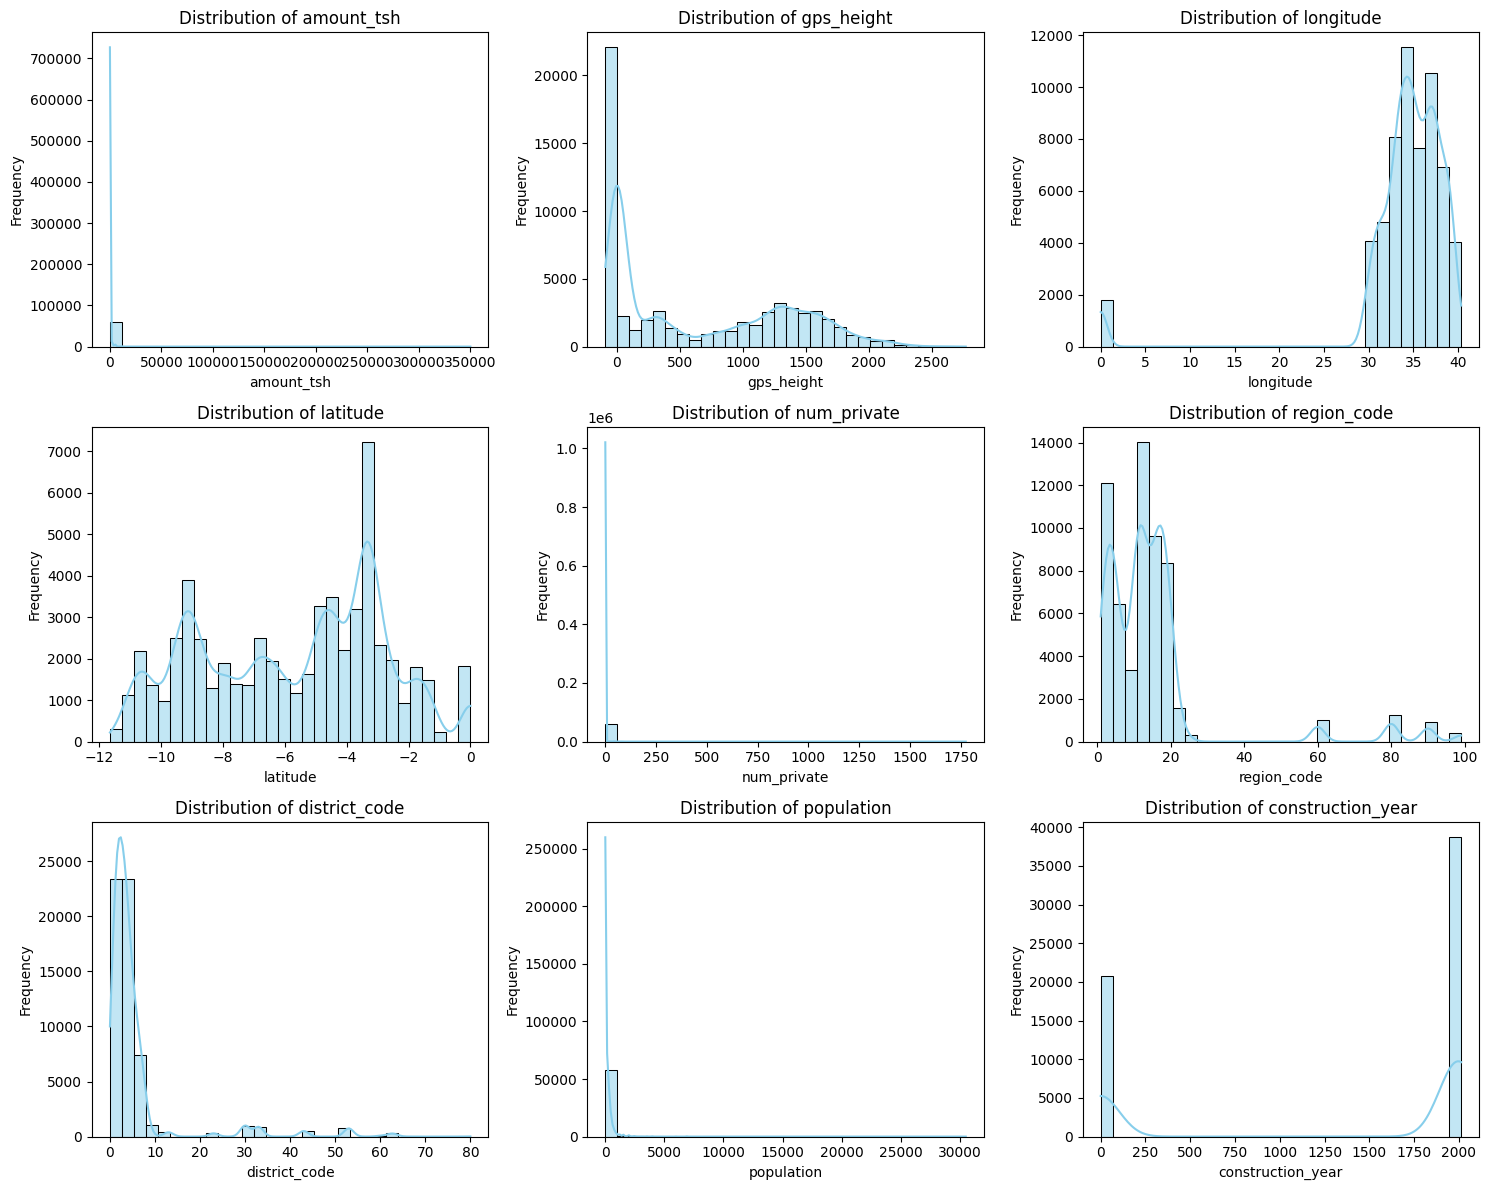

In [73]:
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col != 'id']

# Define the number of rows and columns for subplots
n_cols = 3  # Change this based on how wide you want the frame
n_rows = math.ceil(len(numerical_columns) / n_cols)

# Set figure size (adjust as needed)
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Loop through each column and plot on the same figure
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Plot interpretations and observations

'id': The distribution appears uniform, with all bars roughly the same height.There’s no skew, peaks, or clusters — just a flat, even spread. This was to be expected given that 'id' is a unique identifier and not tied to any meaningful patterns in the data.

'amount_tsh': The distribution is heavily right-skewed. The majority of values are at or near 0. This is shown by a huge spike at 0 or close to 0. A long tail extends all the way up to 350,000, though these large values are rare. Given that Total static head __"total static head" (TSH)__ in water engineering terms, usually refers to:
- The __vertical distance__ (in meters) from the water source (like a well or borehole) to the __discharge point__ (where water comes out), this skew is not alarming. 

'gps_height': The distribution is heavily right-skewed, with most values concentrated below 2000 meters and a spike at 0.Excluding the spike at 0, the most common values appear to lie between 1000 and 1700 meters. After 2000 meters, the frequency of values drops off significantly. 

'longitude': The majority of values fall between 30 and 40 degrees. This is consistent with countries in East Africa such as Tanzania, Kenya and Uganda. Given that our data is focused on Tanzania, this is to be expected. We find a slight spike in coordinates at longitude 0. This is unrealistic as such coordinates would fall within the Atlantic. (It will be important to look at other data such as region and status_group to determine the value of this column) The data outside the 30–40 range (except 0) is minimal or non-existent. This further suggests the dataset is geographically focused. 

'latitude': The values range from approximately -12 to 0 aligns well with Tanzania, which spans from around -12° to -1° latitude.There's a notable spike at approximately -4, indicating a dense cluster of data points in that latitude.(Further analysis of the data to understand if this correlates to a major population center or a region where data collection was heavily focused) Although there was no clear spike at a latitude of 0 degrees, with a frequency of slightly under 2000 records, further analysis will be needed. 

'population': the data in this column is extremely right-skewed. Most values of the population column are concentrated at the very low end (close to 0). (This column is meant to depict the population around the well. It would be important to understand if this is the same as the population using the well)

'construction_year': The graph has two distinct peaks with a large spike near 0. This likely represents missing or unknown data. The second peak represents the years between 1980-2010. A large portion of data falls in the invalid or missing category. (A possible way to handle these missing years is to consider the date available for construction_year for pumps in the region and find an average)




## Visualisation showing distribution of numerical columns by functionality

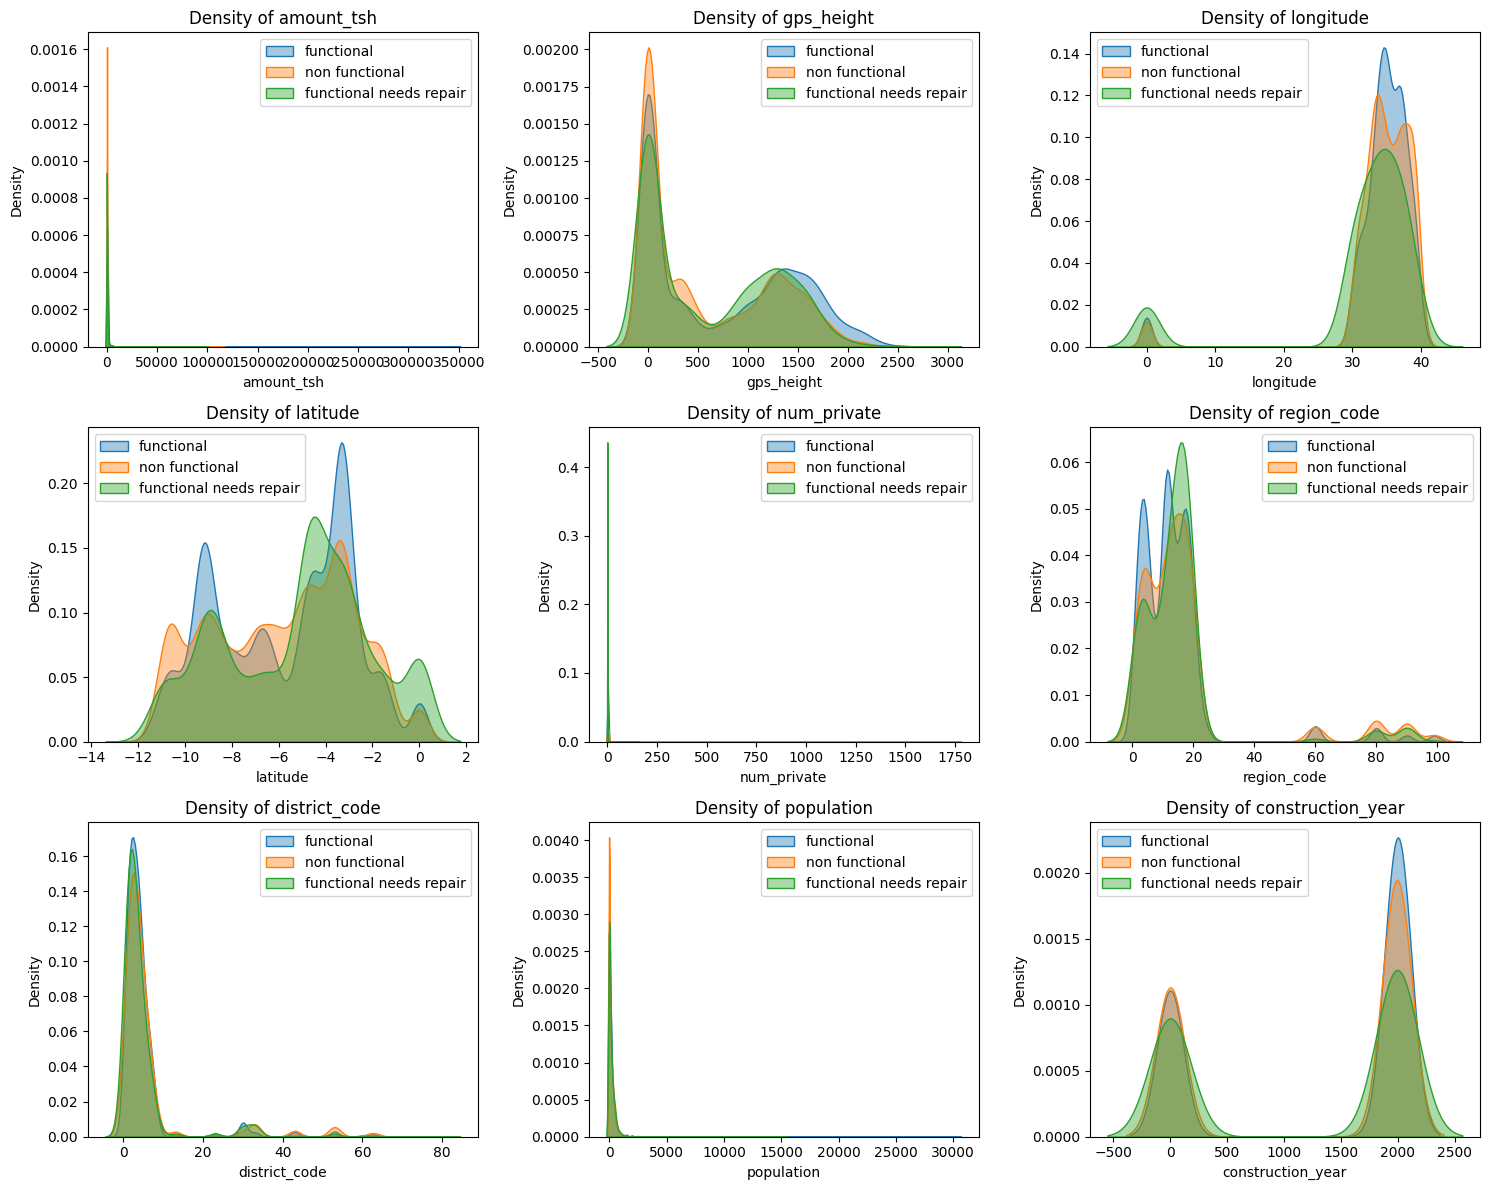

In [74]:
n_cols = 3  # plots per row
n_rows = math.ceil(len(numerical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # Make it easier to index

# Loop through each numerical column
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    for group in df_train['status_group'].unique():
        subset = df_train[df_train['status_group'] == group]
        sns.kdeplot(subset[col], label=group, fill=True, alpha=0.4, ax=ax)
    ax.set_title(f'Density of {col}')
    ax.legend()

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [75]:
# Statistical summary for categorical columns

df_train.describe(include='object')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400,55763,55745,59398,59400,59029,59400,59400,59400,56066,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1896,2145,37399,9,19287,21,125,2092,2,...,8,6,5,5,10,7,3,7,6,3
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,...,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259


# Handling Missing Values

In [49]:
# Count missing values in each column (how many NaNs are in each column)
missing_values_count = df_train.isnull().sum().sort_values(ascending=False). head(10)
missing_values_count

scheme_name          28810
scheme_management     3878
installer             3655
funder                3637
public_meeting        3334
permit                3056
subvillage             371
wpt_name                 2
id                       0
latitude                 0
dtype: int64

In [52]:
# Count how many times 0 appears in each column
zero_counts = (df_train == 0).sum().sort_values(ascending=False)

# Display top 10 columns with the most zero values
print(zero_counts.head(10))

num_private          58643
amount_tsh           41639
population           21381
construction_year    20709
gps_height           20438
permit               17492
public_meeting        5055
longitude             1812
district_code           23
id                       1
dtype: int64


maybe here count permit = false as zero

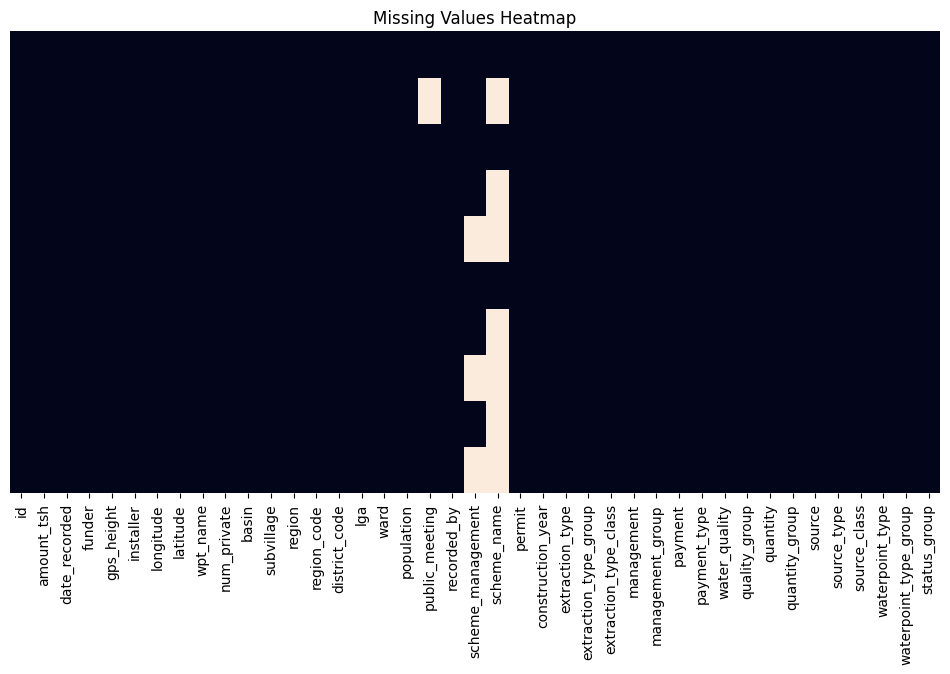

In [64]:
# Missing values heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull().head(10), cmap="rocket", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

## The percentage of missing values in our train data
- Percentage of the total missing values 
- Percentage of each column

In [31]:
# how many total missing values do we have?
total_cells = np.prod(df_train.shape)
total_missing = df_train.isnull().sum().sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100

print(f"Total missing values: {total_missing}")
print(f"Percentage of missing data: {percent_missing:.2f}%")


Total missing values: 46743
Percentage of missing data: 1.92%


## The Data that has missing

In [32]:
# look at the of missing points
missing_values_count[0:8]

scheme_name          28810
scheme_management     3878
installer             3655
funder                3637
public_meeting        3334
permit                3056
subvillage             371
wpt_name                 2
dtype: int64